Взял датасет титаника, хочу проверить гипотезу: влияет ли количество гласных/согласных в имени и фамилии (или по отдельности) на шанс выживания во время крушения

In [ ]:
import pandas as pd
import numpy as nop
import matplotlib.pyplot as plt
import sklearn

In [ ]:
import re

In [ ]:
dt=pd.read_csv("titanic_tf.csv")

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [ ]:
dt["Name"].head(20)

0                                Mr. Owen Harris Braund
1     Mrs. John Bradley (Florence Briggs Thayer) Cum...
2                                 Miss. Laina Heikkinen
3           Mrs. Jacques Heath (Lily May Peel) Futrelle
4                               Mr. William Henry Allen
5                                       Mr. James Moran
6                                Mr. Timothy J McCarthy
7                         Master. Gosta Leonard Palsson
8      Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson
9                    Mrs. Nicholas (Adele Achem) Nasser
10                       Miss. Marguerite Rut Sandstrom
11                              Miss. Elizabeth Bonnell
12                        Mr. William Henry Saundercock
13                           Mr. Anders Johan Andersson
14                  Miss. Hulda Amanda Adolfina Vestrom
15                       Mrs. (Mary D Kingcome) Hewlett
16                                  Master. Eugene Rice
17                          Mr. Charles Eugene W

In [ ]:
dt.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


Максимально удобно для своей задачи преобразую колонку имён убрав префиксы и ненужные слова (в скобках)

In [ ]:
dt["Name"]=dt["Name"].str.split(n=1).str[1]

In [ ]:
dt

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,John Bradley (Florence Briggs Thayer) Cumings,female,38.0,1,0,71.2833
2,1,3,Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Karl Howell Behr,male,26.0,0,0,30.0000


In [ ]:
b=dt["Name"]

In [ ]:
def delete(x):
  for i in range(len(x)):
    if '(' in x[i]:
      min=x[i].index('(')
      max=x[i].index(')')
      x[i]=x[i][:min]+x[i][max+2:]

In [ ]:
delete(b)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dt["Name"]=b

In [ ]:
dt

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,John Bradley Cumings,female,38.0,1,0,71.2833
2,1,3,Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Jacques Heath Futrelle,female,35.0,1,0,53.1000
4,0,3,William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Karl Howell Behr,male,26.0,0,0,30.0000


По количеству гласных/согласных в ИФ

In [ ]:
def count_vowels(x, count):
  сount=0
  vowels = ['a','e','i','o','u']
  for i in range(len(x)):
    if x[i] in vowels:
      count+=1
  return count

In [ ]:
def count_consonants(x, count):
  count = 0
  consonants=set("bcdfghjklmnpqrstvwxyz")
  for i in range(len(x)):
    if x[i] in consonants:
      count+=1
  return count

In [ ]:
arr=[]
for i in range(len(dt["Name"])):
  dt["Name"][i]=dt["Name"][i].lower()
  arr.append(count_vowels(dt["Name"][i],0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
dt["Count_V"]=arr

In [ ]:
dt_v=dt

In [ ]:
dt_v

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Count_V
0,0,3,owen harris braund,male,22.0,1,0,7.2500,6
1,1,1,john bradley cumings,female,38.0,1,0,71.2833,5
2,1,3,laina heikkinen,female,26.0,0,0,7.9250,7
3,1,1,jacques heath futrelle,female,35.0,1,0,53.1000,8
4,0,3,william henry allen,male,35.0,0,0,8.0500,6
...,...,...,...,...,...,...,...,...,...
882,0,2,juozas montvila,male,27.0,0,0,13.0000,6
883,1,1,margaret edith graham,female,19.0,0,0,30.0000,7
884,0,3,catherine helen johnston,female,7.0,1,2,23.4500,8
885,1,1,karl howell behr,male,26.0,0,0,30.0000,4


In [ ]:
arr_set=set(arr)

In [ ]:
f=[]
for i in arr_set:
  k=0
  s=0
  for j in range(len(dt_v)):
    if dt_v['Count_V'][j]==i:
      k+=1
      s+=dt_v["Survived"][j]
  f.append(s/k)
  print("For ",i," vowels",s/k, s ,k)

For  1  vowels 0.6666666666666666 4 6
For  2  vowels 0.6666666666666666 10 15
For  3  vowels 0.46808510638297873 22 47
For  4  vowels 0.3333333333333333 46 138
For  5  vowels 0.3216374269005848 55 171
For  6  vowels 0.38219895287958117 73 191
For  7  vowels 0.4316546762589928 60 139
For  8  vowels 0.3695652173913043 34 92
For  9  vowels 0.4375 21 48
For  10  vowels 0.42105263157894735 8 19
For  11  vowels 0.45454545454545453 5 11
For  12  vowels 0.0 0 3
For  13  vowels 0.4 2 5
For  14  vowels 1.0 2 2


График зависимости количества гласных от процента выживаемости. Как видно на рисунке и по таблице значений сверху можно сказать, что явной зависимости нет (в конце хвост не является показателем того, что чем больше гласных тем выше шанс, так как большое количество гласных(от 10 до 14) имеется у очень маленького количества людей, поэтому этот хвост является неинформативным)

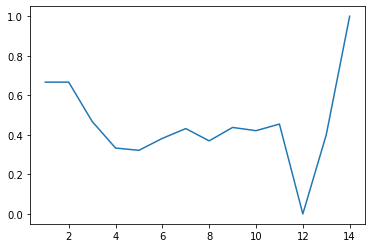

In [ ]:
plt.plot(list(arr_set), f)

In [ ]:
arr=[]
for i in range(len(dt["Name"])):
  dt["Name"][i]=dt["Name"][i].lower()
  arr.append(count_consonants(dt["Name"][i],0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
dt_c=dt
dt_c["Count_C"]=arr
dt_c

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Count_V,Count_C
0,0,3,owen harris braund,male,22.0,1,0,7.2500,6,10
1,1,1,john bradley cumings,female,38.0,1,0,71.2833,5,13
2,1,3,laina heikkinen,female,26.0,0,0,7.9250,7,7
3,1,1,jacques heath futrelle,female,35.0,1,0,53.1000,8,12
4,0,3,william henry allen,male,35.0,0,0,8.0500,6,11
...,...,...,...,...,...,...,...,...,...,...
882,0,2,juozas montvila,male,27.0,0,0,13.0000,6,8
883,1,1,margaret edith graham,female,19.0,0,0,30.0000,7,12
884,0,3,catherine helen johnston,female,7.0,1,2,23.4500,8,14
885,1,1,karl howell behr,male,26.0,0,0,30.0000,4,10


In [ ]:
f=[]
arr_set=set(arr)
for i in arr_set:
  k=0
  s=0
  for j in range(len(dt_v)):
    if dt_v['Count_C'][j]==i:
      k+=1
      s+=dt_v["Survived"][j]
  f.append(s/k)
  print("For ",i," consonants",s/k, s ,k)

For  2  consonants 1.0 2 2
For  3  consonants 0.8 4 5
For  4  consonants 0.3333333333333333 5 15
For  5  consonants 0.5384615384615384 14 26
For  6  consonants 0.3924050632911392 31 79
For  7  consonants 0.43010752688172044 40 93
For  8  consonants 0.24242424242424243 24 99
For  9  consonants 0.4146341463414634 34 82
For  10  consonants 0.4329896907216495 42 97
For  11  consonants 0.38636363636363635 34 88
For  12  consonants 0.4148936170212766 39 94
For  13  consonants 0.30158730158730157 19 63
For  14  consonants 0.4426229508196721 27 61
For  15  consonants 0.2647058823529412 9 34
For  16  consonants 0.35714285714285715 10 28
For  17  consonants 0.3333333333333333 2 6
For  18  consonants 0.4 2 5
For  19  consonants 0.5 1 2
For  20  consonants 0.25 1 4
For  21  consonants 0.0 0 1
For  22  consonants 1.0 1 1
For  23  consonants 1.0 1 1
For  24  consonants 0.0 0 1


С количеством согласных аналогичная ситуация как и с гласными, только тут уже два хвоста, но они оба неинформативны по той же причине, что и в случае с гласными

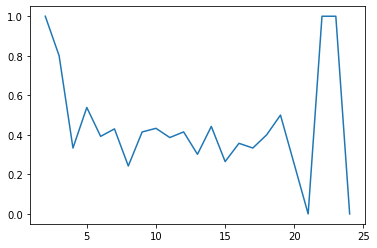

In [ ]:
plt.plot(list(arr_set), f)

По количеству гласных/согласных в И

In [ ]:
dt=dt.drop(["Count_V", "Count_C"], axis=1)
dt

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,owen harris braund,male,22.0,1,0,7.2500
1,1,1,john bradley cumings,female,38.0,1,0,71.2833
2,1,3,laina heikkinen,female,26.0,0,0,7.9250
3,1,1,jacques heath futrelle,female,35.0,1,0,53.1000
4,0,3,william henry allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,juozas montvila,male,27.0,0,0,13.0000
883,1,1,margaret edith graham,female,19.0,0,0,30.0000
884,0,3,catherine helen johnston,female,7.0,1,2,23.4500
885,1,1,karl howell behr,male,26.0,0,0,30.0000


In [ ]:
arr_name=[]
arr_surname=[]
for i in range(len(dt)):
  a=dt["Name"][i]
  if ' ' in a:
    j=a.index(' ')
    arr_name.append(a[:j])
  else:
    arr_name.append(a)

In [ ]:
dt_n=dt.drop(["Name"], axis=1)
dt_n["Names"]=arr_name
dt_n

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Names
0,0,3,male,22.0,1,0,7.2500,owen
1,1,1,female,38.0,1,0,71.2833,john
2,1,3,female,26.0,0,0,7.9250,laina
3,1,1,female,35.0,1,0,53.1000,jacques
4,0,3,male,35.0,0,0,8.0500,william
...,...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000,juozas
883,1,1,female,19.0,0,0,30.0000,margaret
884,0,3,female,7.0,1,2,23.4500,catherine
885,1,1,male,26.0,0,0,30.0000,karl


In [ ]:
count_v=[]
for i in range(len(dt_n)):
  count_v.append(count_vowels(dt_n["Names"][i], 0))

In [ ]:
dt_n["Count_V"]=count_v
dt_n

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Names,Count_V
0,0,3,male,22.0,1,0,7.2500,owen,2
1,1,1,female,38.0,1,0,71.2833,john,1
2,1,3,female,26.0,0,0,7.9250,laina,3
3,1,1,female,35.0,1,0,53.1000,jacques,3
4,0,3,male,35.0,0,0,8.0500,william,3
...,...,...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000,juozas,3
883,1,1,female,19.0,0,0,30.0000,margaret,3
884,0,3,female,7.0,1,2,23.4500,catherine,4
885,1,1,male,26.0,0,0,30.0000,karl,1


In [ ]:
f=[]
arr_set=set(count_v)
for i in arr_set:
  k=0
  s=0
  for j in range(len(dt_n)):
    if dt_n['Count_V'][j]==i:
      k+=1
      s+=dt_n["Survived"][j]
  f.append(s/k)
  print("For ",i," vowels",s/k, s ,k)

For  1  vowels 0.4094488188976378 52 127
For  2  vowels 0.3333333333333333 143 429
For  3  vowels 0.4099616858237548 107 261
For  4  vowels 0.5573770491803278 34 61
For  5  vowels 0.6666666666666666 6 9


Здесь уже зависимость очевидна, так как много людей с 3-4 гласными в имени, поэтому выдвигаю гипотезу о том, что чем больше гласных именно в имени человека, тем выше шанс выжить во время кораблекрушения. Для полноты я ещё проверяю оставшиеся возможные зависимости, но ни одна из них не будет информативной по причине, которую уже описывал в первом случае

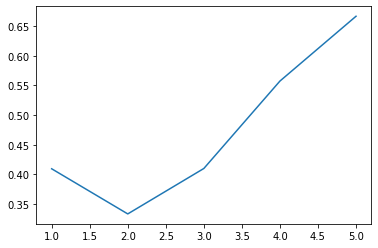

In [ ]:
plt.plot(list(arr_set), f)

In [ ]:
count_c=[]
for i in range(len(dt_n)):
  count_c.append(count_consonants(dt_n["Names"][i], 0))

In [ ]:
dt_n['Count_C']=count_c
dt_n

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Names,Count_V,Count_C
0,0,3,male,22.0,1,0,7.2500,owen,2,2
1,1,1,female,38.0,1,0,71.2833,john,1,3
2,1,3,female,26.0,0,0,7.9250,laina,3,2
3,1,1,female,35.0,1,0,53.1000,jacques,3,4
4,0,3,male,35.0,0,0,8.0500,william,3,4
...,...,...,...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000,juozas,3,3
883,1,1,female,19.0,0,0,30.0000,margaret,3,5
884,0,3,female,7.0,1,2,23.4500,catherine,4,5
885,1,1,male,26.0,0,0,30.0000,karl,1,3


In [ ]:
f=[]
arr_set=set(count_c)
for i in arr_set:
  k=0
  s=0
  for j in range(len(dt_n)):
    if dt_n['Count_C'][j]==i:
      k+=1
      s+=dt_n["Survived"][j]
  f.append(s/k)
  print("For ",i," consonants",s/k, s ,k)

For  1  consonants 0.3076923076923077 4 13
For  2  consonants 0.5081967213114754 62 122
For  3  consonants 0.3642611683848797 106 291
For  4  consonants 0.3506944444444444 101 288
For  5  consonants 0.3805970149253731 51 134
For  6  consonants 0.4722222222222222 17 36
For  7  consonants 0.5 1 2
For  8  consonants 0.0 0 1


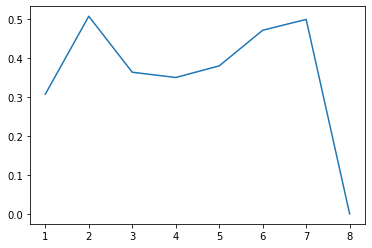

In [ ]:
plt.plot(list(arr_set), f)

По количеству гласных/согласных в Ф

In [ ]:
dt

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,owen harris braund,male,22.0,1,0,7.2500
1,1,1,john bradley cumings,female,38.0,1,0,71.2833
2,1,3,laina heikkinen,female,26.0,0,0,7.9250
3,1,1,jacques heath futrelle,female,35.0,1,0,53.1000
4,0,3,william henry allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,juozas montvila,male,27.0,0,0,13.0000
883,1,1,margaret edith graham,female,19.0,0,0,30.0000
884,0,3,catherine helen johnston,female,7.0,1,2,23.4500
885,1,1,karl howell behr,male,26.0,0,0,30.0000


In [ ]:
arr_surname=[]
for i in range(len(dt)):
  a=dt["Name"][i]
  if ' ' in a:
    j=a.index(' ')
    arr_surname.append(a[j:])
  else:
    arr_surname.append(a[j:])

In [ ]:
dt_sur=dt.drop(["Name"], axis=1)
dt_sur["Surname"]=arr_surname
dt_sur

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Surname
0,0,3,male,22.0,1,0,7.2500,harris braund
1,1,1,female,38.0,1,0,71.2833,bradley cumings
2,1,3,female,26.0,0,0,7.9250,heikkinen
3,1,1,female,35.0,1,0,53.1000,heath futrelle
4,0,3,male,35.0,0,0,8.0500,henry allen
...,...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000,montvila
883,1,1,female,19.0,0,0,30.0000,edith graham
884,0,3,female,7.0,1,2,23.4500,helen johnston
885,1,1,male,26.0,0,0,30.0000,howell behr


In [ ]:
count_v=[]
for i in range(len(dt_n)):
  count_v.append(count_vowels(dt_sur["Surname"][i], 0))

In [ ]:
dt_sur["Count_V"]=count_v
dt_sur

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Surname,Count_V
0,0,3,male,22.0,1,0,7.2500,harris braund,4
1,1,1,female,38.0,1,0,71.2833,bradley cumings,4
2,1,3,female,26.0,0,0,7.9250,heikkinen,4
3,1,1,female,35.0,1,0,53.1000,heath futrelle,5
4,0,3,male,35.0,0,0,8.0500,henry allen,3
...,...,...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000,montvila,3
883,1,1,female,19.0,0,0,30.0000,edith graham,4
884,0,3,female,7.0,1,2,23.4500,helen johnston,4
885,1,1,male,26.0,0,0,30.0000,howell behr,3


In [ ]:
f=[]
arr_set=set(count_v)
for i in arr_set:
  k=0
  s=0
  for j in range(len(dt_sur)):
    if dt_sur['Count_V'][j]==i:
      k+=1
      s+=dt_sur["Survived"][j]
  f.append(s/k)
  print("For ",i," vowels",s/k, s ,k)

For  0  vowels 0.5833333333333334 7 12
For  1  vowels 0.54 27 50
For  2  vowels 0.35323383084577115 71 201
For  3  vowels 0.359375 69 192
For  4  vowels 0.4186046511627907 72 172
For  5  vowels 0.3458646616541353 46 133
For  6  vowels 0.390625 25 64
For  7  vowels 0.47368421052631576 18 38
For  8  vowels 0.3 3 10
For  9  vowels 0.125 1 8
For  10  vowels 0.0 0 1
For  11  vowels 0.4 2 5
For  12  vowels 1.0 1 1


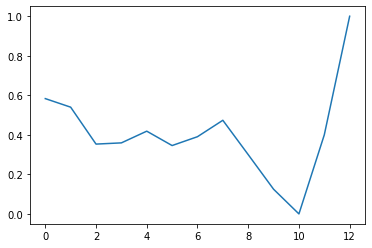

In [ ]:
plt.plot(list(arr_set), f)

In [ ]:
count_c=[]
for i in range(len(dt_sur)):
  count_c.append(count_consonants(dt_sur["Surname"][i], 0))
dt_sur["Count_C"]=count_c
dt_sur

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Surname,Count_V,Count_C
0,0,3,male,22.0,1,0,7.2500,harris braund,4,8
1,1,1,female,38.0,1,0,71.2833,bradley cumings,4,10
2,1,3,female,26.0,0,0,7.9250,heikkinen,4,5
3,1,1,female,35.0,1,0,53.1000,heath futrelle,5,8
4,0,3,male,35.0,0,0,8.0500,henry allen,3,7
...,...,...,...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000,montvila,3,5
883,1,1,female,19.0,0,0,30.0000,edith graham,4,7
884,0,3,female,7.0,1,2,23.4500,helen johnston,4,9
885,1,1,male,26.0,0,0,30.0000,howell behr,3,7


In [ ]:
f=[]
arr_set=set(count_c)
for i in arr_set:
  k=0
  s=0
  for j in range(len(dt_sur)):
    if dt_sur['Count_C'][j]==i:
      k+=1
      s+=dt_sur["Survived"][j]
  f.append(s/k)
  print("For ",i," consonants",s/k, s ,k)

For  0  consonants 0.7777777777777778 7 9
For  1  consonants 0.4 2 5
For  2  consonants 0.38461538461538464 15 39
For  3  consonants 0.3723404255319149 35 94
For  4  consonants 0.36752136752136755 43 117
For  5  consonants 0.4083333333333333 49 120
For  6  consonants 0.41975308641975306 34 81
For  7  consonants 0.34831460674157305 31 89
For  8  consonants 0.3888888888888889 42 108
For  9  consonants 0.3780487804878049 31 82
For  10  consonants 0.3333333333333333 19 57
For  11  consonants 0.42857142857142855 15 35
For  12  consonants 0.37037037037037035 10 27
For  13  consonants 0.3333333333333333 2 6
For  14  consonants 0.5 3 6
For  15  consonants 0.3333333333333333 2 6
For  17  consonants 0.0 0 3
For  19  consonants 0.6666666666666666 2 3


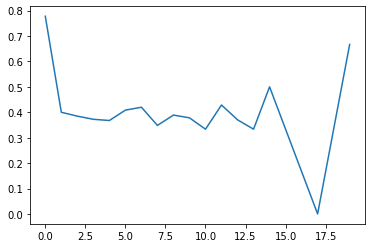

In [ ]:
plt.plot(list(arr_set), f)

Преобразование данных

In [ ]:
import sklearn
from sklearn.metrics import f1_score, roc_auc_score

In [ ]:
dt_n.drop(["Names", "Count_C"], axis=1,inplace=True)

In [ ]:
dt_n

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Count_V
0,0,3,male,22.0,1,0,7.2500,2
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,3
3,1,1,female,35.0,1,0,53.1000,3
4,0,3,male,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000,3
883,1,1,female,19.0,0,0,30.0000,3
884,0,3,female,7.0,1,2,23.4500,4
885,1,1,male,26.0,0,0,30.0000,1


In [ ]:
dt_n=pd.get_dummies(dt_n, columns=["Sex"])

In [ ]:
dt_n

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Count_V,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,2,0,1
1,1,1,38.0,1,0,71.2833,1,1,0
2,1,3,26.0,0,0,7.9250,3,1,0
3,1,1,35.0,1,0,53.1000,3,1,0
4,0,3,35.0,0,0,8.0500,3,0,1
...,...,...,...,...,...,...,...,...,...
882,0,2,27.0,0,0,13.0000,3,0,1
883,1,1,19.0,0,0,30.0000,3,1,0
884,0,3,7.0,1,2,23.4500,4,1,0
885,1,1,26.0,0,0,30.0000,1,0,1


In [ ]:
data=dt_n.drop(["Survived"], axis=1)
target=dt_n["Survived"]

In [ ]:
data

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Count_V,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,2,0,1
1,1,38.0,1,0,71.2833,1,1,0
2,3,26.0,0,0,7.9250,3,1,0
3,1,35.0,1,0,53.1000,3,1,0
4,3,35.0,0,0,8.0500,3,0,1
...,...,...,...,...,...,...,...,...
882,2,27.0,0,0,13.0000,3,0,1
883,1,19.0,0,0,30.0000,3,1,0
884,3,7.0,1,2,23.4500,4,1,0
885,1,26.0,0,0,30.0000,1,0,1


Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
data_standart=StandardScaler().fit_transform(data)

In [ ]:
data_standart[0]

array([ 0.83052363, -0.52936601,  0.42990395, -0.4749808 , -0.50358635,
       -0.38078725, -0.74026551,  0.74026551])

In [ ]:
data_minmax=MinMaxScaler().fit_transform(data)

In [ ]:
data_minmax[0]

array([1.        , 0.27117366, 0.125     , 0.        , 0.01415106,
       0.25      , 0.        , 1.        ])

In [ ]:
data_normalize=sklearn.preprocessing.normalize(data)

In [ ]:
data_normalize[0]

array([0.12773911, 0.93675348, 0.0425797 , 0.        , 0.30870285,
       0.08515941, 0.        , 0.0425797 ])

Проверим зависимы ли признаки Pclass и Fare (по сути они зависимы так как чем выше класс тем меньше стоит билет) на примере данных преобразованных при помощи StandardScaler

Также стоит объянить почему я не разбривал категориальный признак Pclass при помощи get_dummies. Ведь чем больше этот признак тем менше вероятность выжить, так как люди купившие билет первого класса имеют больше привелегий, в отличие от купивших 2 и 3 класс. Проверим это

In [ ]:
p1=0
l1=0
p23=0
l23=0
for i in range(len(data)):
  if data["Pclass"][i]==1:
    p1+=target[i]
    l1+=1
  else:
    p23+=target[i]
    l23+=1
print("Процент выживших из первого класса", p1/l1)
print("Процент выживших из второго и третьего класса", p23/l23)

Процент выживших из первого класса 0.6296296296296297
Процент выживших из второго и третьего класса 0.30700447093889716


In [ ]:
from sklearn.linear_model import RidgeClassifier

In [ ]:
from collections import Counter
Counter(target).values()

dict_values([545, 342])

In [ ]:
data_train_standart=data_standart[:600]
target_train=target[:600]
data_test_standart=data_standart[600:]
target_test=target=target[600:]

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np

In [ ]:
data

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Count_V,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,2,0,1
1,1,38.0,1,0,71.2833,1,1,0
2,3,26.0,0,0,7.9250,3,1,0
3,1,35.0,1,0,53.1000,3,1,0
4,3,35.0,0,0,8.0500,3,0,1
...,...,...,...,...,...,...,...,...
882,2,27.0,0,0,13.0000,3,0,1
883,1,19.0,0,0,30.0000,3,1,0
884,3,7.0,1,2,23.4500,4,1,0
885,1,26.0,0,0,30.0000,1,0,1


Здесь как раз таки будет проверка гипотезы о кол-ве гласных в имени

In [ ]:
for i in np.linspace(0.001, 20, 20):
  model=RidgeClassifier(alpha=i, max_iter=1300)
  model.fit(data_train_standart, target_train)
  prediction=model.predict(data_test_standart)
  print("При alpha =",i,"точность - ",accuracy_score(target_test, prediction))
  print("Коэфиценты при это равны - ", model.coef_)

При alpha = 0.001 точность -  0.7874564459930313
Коэфиценты при это равны -  [[-0.28600703 -0.15659818 -0.10402471 -0.00682932 -0.022272   -0.0252836
   0.25553888 -0.25553888]]
При alpha = 1.053578947368421 точность -  0.7874564459930313
Коэфиценты при это равны -  [[-0.28493943 -0.15593696 -0.10381276 -0.00680213 -0.0215957  -0.02511572
   0.25533415 -0.25533415]]
При alpha = 2.106157894736842 точность -  0.7874564459930313
Коэфиценты при это равны -  [[-0.2838827  -0.15528128 -0.1036011  -0.00677435 -0.02092855 -0.02494902
   0.25512967 -0.25512967]]
При alpha = 3.158736842105263 точность -  0.7874564459930313
Коэфиценты при это равны -  [[-0.28283668 -0.15463108 -0.10338975 -0.00674599 -0.02027041 -0.02478348
   0.25492542 -0.25492542]]
При alpha = 4.211315789473685 точность -  0.7874564459930313
Коэфиценты при это равны -  [[-0.28180118 -0.15398629 -0.10317872 -0.00671706 -0.0196211  -0.02461908
   0.25472141 -0.25472141]]
При alpha = 5.263894736842105 точность -  0.78745644599303

Видно, что 6 коэффицент, соответсвующий признаку Count_V по модулю больше 0.01, однако с другой стороны относительно небольшой коэф, но и недостаточно маленький для того, чтобы его исключить. Я считаю, что это связано с тем, что такие признаки как Pclass и Sex очень сильно выделяются на его фоне и это объяснимо, ведь у людей первого класса больше привелегий, чем у остальных, также при кораблекрушении привелегий больше у женщин, чем у мужчин (то есть в первую очередь будут спасать женщин, а потом мужщин). Именно поэтому эти два признака очень важны для модели, и поэтому наш признак Count_V не сильно выделяется на их фоне

Точность везде одинакова, однако коэфиценты признаков меняются. Мною было верно подмечено, что признаки Pclass и Fare зависимы, так как коэфицент при Fare меньше 0.001 им можно пренебречь, когда есть признак Pclass у которого коэф. около 0.26. Также можно ещё и убрать признак Parents/Children Aboard так как его коэф. меньше 0.001

In [ ]:
data=data.drop(["Fare", "Parents/Children Aboard"], axis=1)

In [ ]:
data

,Pclass,Age,Siblings/Spouses Aboard,Count_V,Sex_female,Sex_male
0,3,22.0,1,2,0,1
1,1,38.0,1,1,1,0
2,3,26.0,0,3,1,0
3,1,35.0,1,3,1,0
4,3,35.0,0,3,0,1
...,...,...,...,...,...,...
882,2,27.0,0,3,0,1
883,1,19.0,0,3,1,0
884,3,7.0,1,4,1,0
885,1,26.0,0,1,0,1


In [ ]:
data_normalize=sklearn.preprocessing.normalize(data)

In [ ]:
data_standart=StandardScaler().fit_transform(data)
data_minmax=MinMaxScaler().fit_transform(data)

In [ ]:
from sklearn.model_selection import cross_val_score

RidgeClassifier

In [ ]:
scores=cross_val_score(RidgeClassifier(max_iter=2300, random_state=42, solver='saga'), data_normalize, target, cv=4, scoring='accuracy')
scores

array([0.65765766, 0.65315315, 0.65765766, 0.66515837])

In [ ]:
scores=cross_val_score(RidgeClassifier(max_iter=2300, random_state=42, solver='saga'), data_minmax, target, cv=4, scoring='accuracy')
scores

array([0.7972973 , 0.7972973 , 0.76576577, 0.7918552 ])

Для вариативности посмотрим ещё и на другие модели

RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
scores=cross_val_score(RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=8, random_state=42, class_weight='balanced'), data_minmax, target, cv=4, scoring='accuracy')
print(scores)
print(scores.mean())

[0.7972973  0.80630631 0.80630631 0.84615385]
0.814015939015939


In [ ]:
scores=cross_val_score(RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=8, random_state=42, class_weight='balanced'), data_normalize, target, cv=4, scoring='accuracy')
print(scores)
print(scores.mean())

[0.7972973  0.82882883 0.8018018  0.83257919]
0.8151267783620725


In [ ]:
scores=cross_val_score(RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=8, random_state=42, class_weight='balanced'), data_standart, target, cv=4, scoring='accuracy')
print(scores)
print(scores.mean())

[0.7972973  0.81981982 0.7972973  0.83710407]
0.8128796217031511


GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
scores=cross_val_score(GradientBoostingClassifier(n_estimators=100, max_depth=4, min_samples_leaf=8, min_samples_split=4, random_state=42), data_minmax, target, cv=4, scoring='accuracy')
print(scores)
print(scores.mean())

[0.7972973  0.84684685 0.82882883 0.85972851]
0.8331753699400758


В итоге получил точность в 83% с GradientBoostingClassifier
